In [1]:
from InitData import *
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

# For 100K dataset

In [2]:
rData = InitRatingsData100K()

Dataset ratings.csv loaded


In [3]:
#function to check the neighbours after n random solicitations for 
def neighbour_check_popular(df,n):
    users = df['userId'].unique()
    sizes = []
    #check all users
    for user in users:
        temp = df.copy()
        #select popular items to propose
        elicits = temp[temp['userId']==user]['movieId'].value_counts().head(n).index.to_numpy()
        for e in elicits:
            #find rating of target user for elicited item
            rating = float(temp[(temp['userId']==user)&(temp['movieId']==e)]['rating'])
            #if target user liked, only users that liked will stay
            if rating > 2.5:
                matching_users = temp[(temp['movieId']==e)&(temp['rating']>2.5)]['userId']
                temp = temp[temp['userId'].isin(matching_users)]
            #if target user disliked, only users that disliked will stay
            else:
                matching_users = temp[(temp['movieId']==e)&(temp['rating']<=2.5)]['userId']
                temp = temp[temp['userId'].isin(matching_users)]
        #-1, because target users is not in neighborhood
        sizes.append(np.shape(temp['userId'].unique())[0]-1)
    return sizes

In [4]:
#function to check the neighbours after n random solicitations for 
def neighbour_check_popular_smart(df,n):
    users = df['userId'].unique()
    sizes = [0 for i in range(1,n+1)]
    #check all users
    for count,user in enumerate(users):
        temp = df.copy()
        elicits = temp[temp['userId']==user]['movieId'].value_counts().head(n).index.to_numpy()
        for i,e in enumerate(elicits):
            #find rating of target user for elicited item
            rating = float(temp[(temp['userId']==user)&(temp['movieId']==e)]['rating'])
            #if target user liked, only users that liked will stay
            if rating > 2.5:
                matching_users = temp[(temp['movieId']==e)&(temp['rating']>2.5)]['userId']
                temp = temp[temp['userId'].isin(matching_users)]
            #if target user disliked, only users that disliked will stay
            else:
                matching_users = temp[(temp['movieId']==e)&(temp['rating']<=2.5)]['userId']
                temp = temp[temp['userId'].isin(matching_users)]
            sizes[i] = sizes[i]+np.shape(temp['userId'].unique())[0]-1
        if count%500==0:
            print(count//500)
    for i in range(len(sizes)):
        sizes[i] = sizes[i]/len(users)
    return sizes

0
1


<ipython-input-5-4efa8eb531ab>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


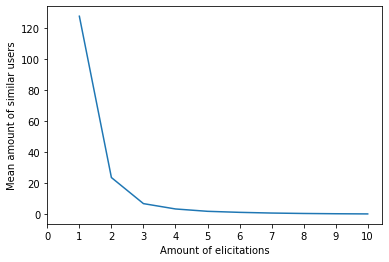

In [5]:
#plot values for different number of elicitations
def plot_elicitation_neighbours_popular(df):
    y_val = neighbour_check_popular_smart(df,10)
    x_val = [int(i) for i in range(1,11)]
    fig, ax = plt.subplots()
    ax.plot(x_val,y_val)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax.set_yticks([0,20,40,60,80,100,120])
    ax.set_xlabel('Amount of elicitations')
    ax.set_ylabel('Mean amount of similar users')
    fig.savefig('figs/data_analysis/plot_popular100K.png')
    fig.show()
plot_elicitation_neighbours_popular(rData)

Dataset ratings.csv loaded
0
1
2
3
4
5
6
7
8
9
10
11
12
13


<ipython-input-6-df65df36382e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


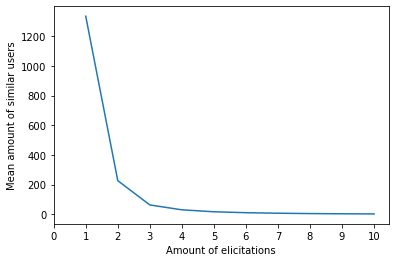

In [6]:
rData2 = InitRatingsData25MSmall(25)
#plot values for different number of elicitations
def plot_elicitation_neighbours_popular_large(df):
    y_val = neighbour_check_popular_smart(df,10)
    x_val = [int(i) for i in range(1,11)]
    fig, ax = plt.subplots()
    ax.plot(x_val,y_val)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax.set_yticks([0,200,400,600,800,1000,1200])
    ax.set_xlabel('Amount of elicitations')
    ax.set_ylabel('Mean amount of similar users')
    fig.savefig('figs/data_analysis/plot_popular_25M.png')
    fig.show()
plot_elicitation_neighbours_popular_large(rData2)

# For 25M dataset

In [7]:
rData = InitRatingsData25M()

Dataset ratings.csv loaded


<AxesSubplot:title={'center':'Distribution of the ratings'}, xlabel='Amount of ratings', ylabel='Rating'>

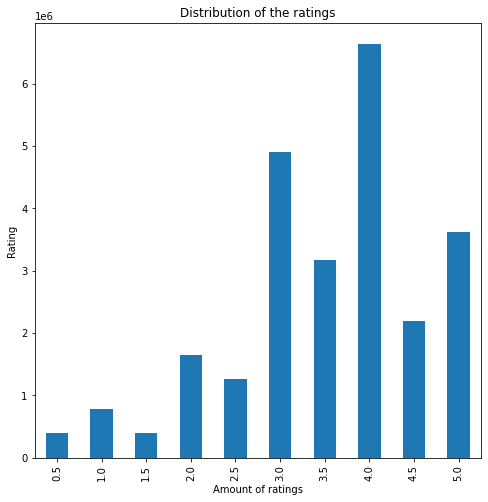

In [8]:
#plotting rating distribution
df = rData['rating'].value_counts().sort_index()

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(kind='bar',ylabel='Rating',xlabel='Amount of ratings', title='Distribution of the ratings',ax=ax)

Text(0.5, 1.0, 'Amount of ratings for each user (ordered)')

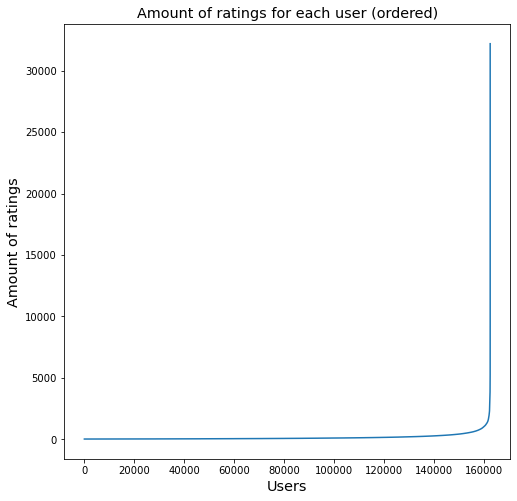

In [9]:
#plotting distribution of amount of ratings/user
df = rData.groupby('userId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ylabel='Rating',ax=ax,label='ratings')
plt.xlabel('Users',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.title('Amount of ratings for each user (ordered)',fontsize='x-large')

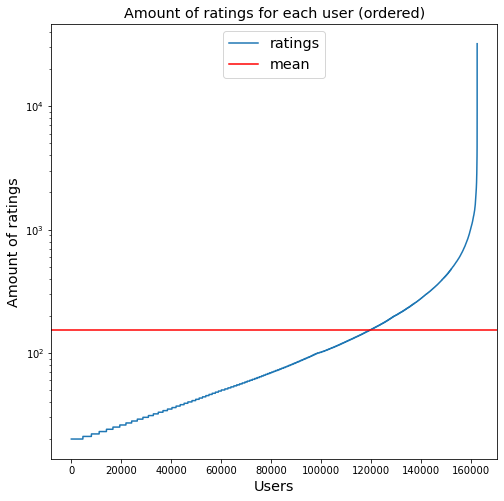

In [10]:
df = rData.groupby('userId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

mean = df.mean()

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ylabel='Rating',ax=ax,label='ratings')
plt.xlabel('Users',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.yscale("log")
plt.title('Amount of ratings for each user (ordered)',fontsize='x-large')
plt.axhline(y = mean, color = 'r', linestyle = '-',label='mean')
plt.legend(loc='upper center',fontsize='x-large')

In [11]:
#filtering needed for users with extreme amount of ratings?
df = rData.groupby('userId',as_index=True).size().sort_values()
print(df.tail())

userId
20055      7488
33844      7919
137293     8913
80974      9178
72315     32202
dtype: int64


Text(0.5, 1.0, 'Amount of ratings for each movie (ordered)')

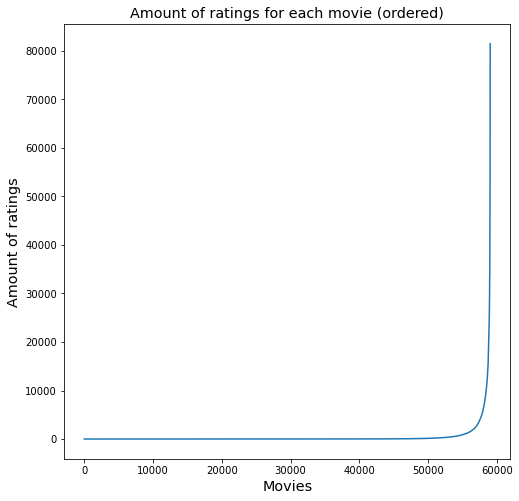

In [12]:
#plotting amount of ratings for each movie
df = rData.groupby('movieId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ax=ax)
plt.xlabel('Movies',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.title('Amount of ratings for each movie (ordered)',fontsize='x-large')

423.3931444442563
6.0


<ipython-input-13-349c0fc7eb39>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


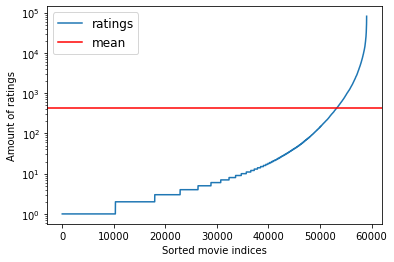

In [13]:
df = rData['movieId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.mean(y_val)
print(mean)
print(np.median(y_val))
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='mean')
ax.legend(fontsize=12)
ax.set_xlabel('Sorted movie indices')
ax.set_ylabel('Amount of ratings')
fig.savefig('figs/data_analysis/items_vs_ratingsfull')
fig.show()

## For Subset of 25M dataset

In [14]:
rData_small = InitRatingsData25MSmall(10)

Dataset ratings.csv loaded


In [15]:
print('Mean = '+str(rData_small['rating'].mean()))

Mean = 3.5303523068693248


<ipython-input-16-6d59a61d9647>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


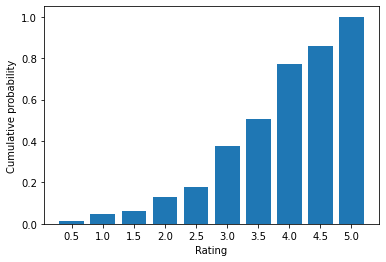

In [16]:
#plotting rating distribution
temp = rData_small['rating'].value_counts().sort_index().to_numpy()
y_val = [0 for i in range(len(temp))]
for i in range(len(temp)):
    for j in temp[:i+1]:
        y_val[i] += j
    y_val[i] = y_val[i]/sum(temp)
        
x_val = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
fig,ax = plt.subplots()
ax.bar(x_val,y_val,width=0.4)
ax.set_xlabel('Rating')
ax.set_ylabel('Cumulative probability')
ax.set_xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
fig.savefig('figs/data_analysis/cummulative_rating_distrubtion')
fig.show()

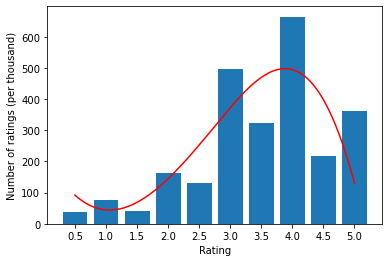

In [17]:
from scipy.interpolate import make_interp_spline
y_val = rData_small['rating'].value_counts().sort_index().to_numpy()
x_val = np.array([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
y_val_temp = [i/1000 for i in y_val]
x_val_comb = [(x_val[2*i]+x_val[2*i+1])/2 for i in range(len(x_val)//2)]
y_val_comb = [(y_val[2*i]+y_val[2*i+1])/2000 for i in range(len(y_val)//2)]

spl = make_interp_spline(x_val_comb, y_val_comb)
x_smooth = np.linspace(x_val.min(), x_val.max(), 500)
y_smooth = spl(x_smooth)

fig, ax = plt.subplots()
ax.bar(x_val, y_val_temp,width=0.4)
ax.plot(x_smooth, y_smooth, color='red')
ax.set_xlabel('Rating')
ax.set_ylabel('Number of ratings (per thousand)')
ax.set_xticks([0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
fig.savefig('figs/data_analysis/rating_distribution')
plt.show()

71.0


<ipython-input-18-a7d591064250>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


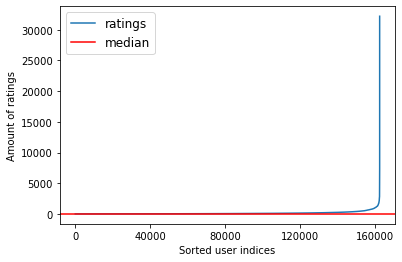

In [18]:
df = rData_small['userId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = df.index.to_numpy()
x_val.sort()
mean = np.median(y_val)
print(mean)
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.axhline(y=mean,color='r',linestyle='-',label='median')
ax.legend(fontsize=12)
ax.set_xticks([0,40000,80000,120000,160000])
ax.set_xlabel('Sorted user indices')
ax.set_ylabel('Amount of ratings')
fig.show()

71.0


<ipython-input-19-79c2967b75e7>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


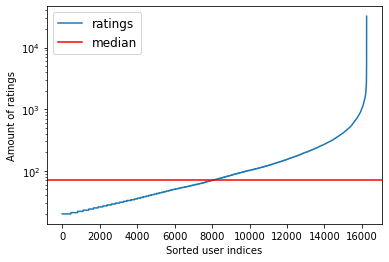

In [19]:
df = rData_small['userId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.median(y_val)
print(mean)
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='median')
ax.legend(fontsize=12)
#ax.set_xticks([0,40000,80000,120000,160000])
ax.set_xlabel('Sorted user indices')
ax.set_ylabel('Amount of ratings')
fig.savefig('figs/data_analysis/user_vs_ratingsv1')
fig.show()

In [20]:
#users with most ratings
df = rData_small.groupby('userId',as_index=True).size().sort_values()
print(df.tail())

userId
103611     4861
61010      5244
92046      6564
20055      7488
72315     32202
dtype: int64


59.802458254924844
2.0


<ipython-input-21-e98cbb9ff9c2>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


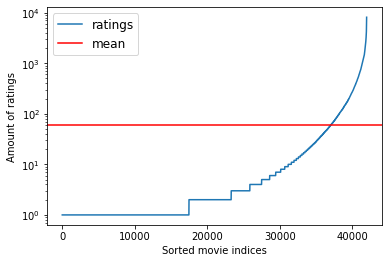

In [21]:
df = rData_small['movieId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.mean(y_val)
print(mean)
print(np.median(y_val))
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='mean')
ax.legend(fontsize=12)
ax.set_xlabel('Sorted movie indices')
ax.set_ylabel('Amount of ratings')
fig.savefig('figs/data_analysis/items_vs_ratingsv1')
fig.show()

In [22]:
#data manipulation
df2 = rData_small
counts = df2['movieId'].value_counts()
rng = np.random.RandomState(1)
count=0

fractions = [1]+[0.7/(i**2) for i in range(1,11)]
tot_removables = np.array([0])
for i in range(1,11):
    items = counts[counts==i].index.to_numpy()
    size = np.shape(items)[0]*fractions[i]
    
    removables = rng.choice(items,int(size),replace=False)
    tot_removables = np.concatenate((tot_removables,removables))
df2 = df2[~df2['movieId'].isin(tot_removables)]

87.86121773426771


<ipython-input-23-0843a6e1ef18>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


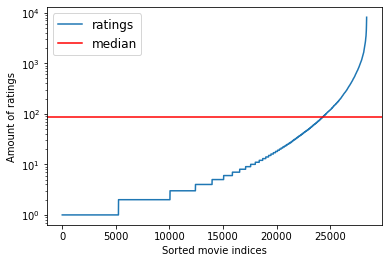

In [23]:
df = df2['movieId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.mean(y_val)
print(mean)
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='median')
ax.legend(fontsize=12)
ax.set_xlabel('Sorted movie indices')
ax.set_ylabel('Amount of ratings')
fig.savefig('figs/data_analysis/items_vs_ratingsv2')
fig.show()

71.0


<ipython-input-24-461bf1c24850>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


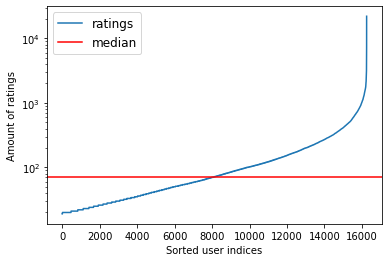

In [24]:
df = df2['userId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.median(y_val)
print(mean)
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='median')
ax.legend(fontsize=12)
#ax.set_xticks([0,40000,80000,120000,160000])
ax.set_xlabel('Sorted user indices')
ax.set_ylabel('Amount of ratings')
fig.savefig('figs/data_analysis/users_vs_ratingsv2')
fig.show()

<ipython-input-25-ab0452a3d753>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


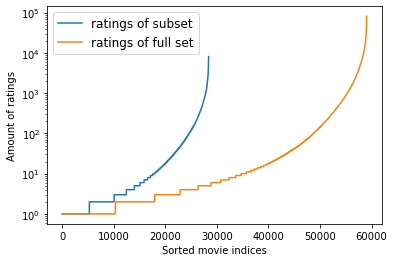

In [25]:
df = df2['movieId'].value_counts(ascending=True)
y_val_1 = df.to_numpy()
x_val_1 = np.array([i for i in range(len(y_val_1))])

temp = rData['movieId'].value_counts(ascending=True)
y_val_2 = temp.to_numpy()
x_val_2 = np.array([i for i in range(len(y_val_2))])

fig,ax = plt.subplots()
ax.plot(x_val_1,y_val_1,label='ratings of subset')
ax.plot(x_val_2,y_val_2,label='ratings of full set')
ax.set_yscale('log')
ax.legend(fontsize=12)
ax.set_xlabel('Sorted movie indices')
ax.set_ylabel('Amount of ratings')
fig.show()

## For 1M dataset

In [26]:
rData = InitRatingsData1M()

Dataset ratings.dat loaded


<AxesSubplot:title={'center':'Distribution of the ratings'}, xlabel='Amount of ratings', ylabel='Rating'>

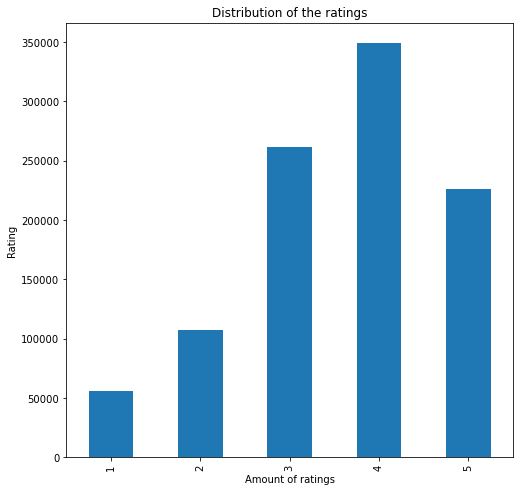

In [27]:
#plotting rating distribution
df = rData['rating'].value_counts().sort_index()

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(kind='bar',ylabel='Rating',xlabel='Amount of ratings', title='Distribution of the ratings',ax=ax)

Text(0.5, 1.0, 'Amount of ratings for each user (ordered)')

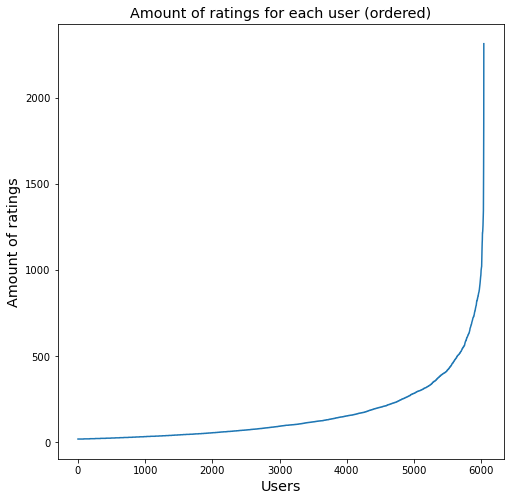

In [28]:
#plotting distribution of amount of ratings/user
df = rData.groupby('userId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ylabel='Rating',ax=ax,label='ratings')
plt.xlabel('Users',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.title('Amount of ratings for each user (ordered)',fontsize='x-large')

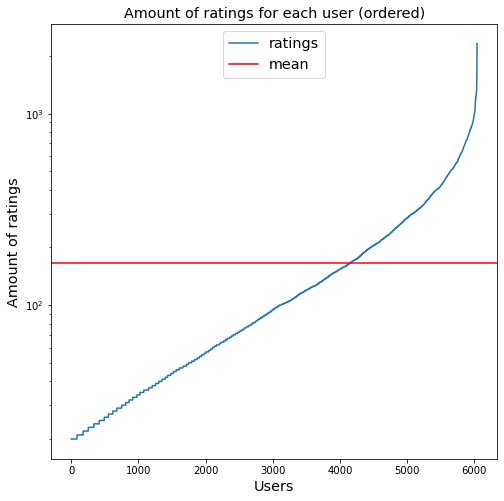

In [29]:
df = rData.groupby('userId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

mean = df.mean()

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ylabel='Rating',ax=ax,label='ratings')
plt.xlabel('Users',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.yscale("log")
plt.title('Amount of ratings for each user (ordered)',fontsize='x-large')
plt.axhline(y = mean, color = 'r', linestyle = '-',label='mean')
plt.legend(loc='upper center',fontsize='x-large')

In [30]:
#filtering needed for users with extreme amount of ratings?
df = rData.groupby('userId',as_index=True).size().sort_values()
print(df.tail())

userId
1181    1521
1941    1595
4277    1743
1680    1850
4169    2314
dtype: int64


Text(0.5, 1.0, 'Amount of ratings for each movie (ordered)')

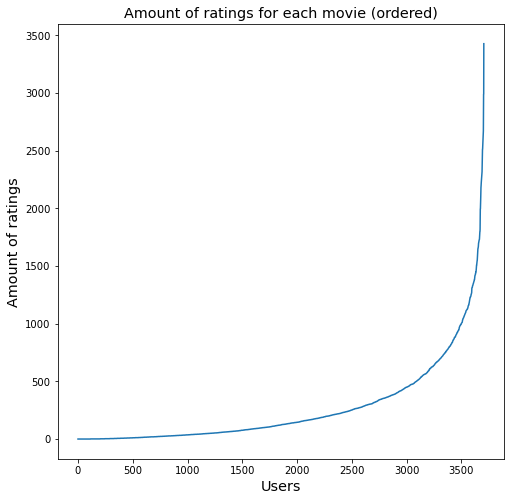

In [31]:
df = rData.groupby('movieId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ax=ax)
plt.xlabel('Users',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.title('Amount of ratings for each movie (ordered)',fontsize='x-large')

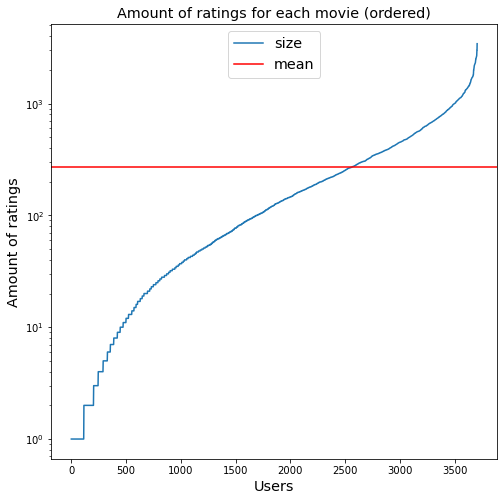

In [32]:
df = rData.groupby('movieId',as_index=False).size().sort_values('size')
df = df.reset_index()
df = df['size']

mean = df.mean()

fig,ax = plt.subplots(1,1,figsize=(8,8))
df.plot(ax=ax)
plt.xlabel('Users',fontsize='x-large')
plt.ylabel('Amount of ratings',fontsize='x-large')
plt.yscale("log")
plt.title('Amount of ratings for each movie (ordered)',fontsize='x-large')
plt.axhline(y = mean, color = 'r', linestyle = '-',label='mean')
plt.legend(loc='upper center',fontsize='x-large')

## For smaller subsets

In [33]:
smallData = InitRatingsSubSet(100)

Dataset ratings.csv loaded


25.37883848723198


<ipython-input-34-3ff2e2d7758b>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


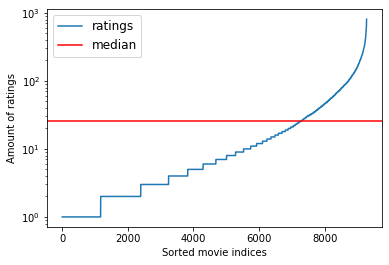

In [34]:
df = smallData['movieId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.mean(y_val)
print(mean)
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='median')
ax.legend(fontsize=12)
ax.set_xlabel('Sorted movie indices')
ax.set_ylabel('Amount of ratings')
#fig.savefig('figs/items_vs_ratingsv2')
fig.show()

71.0


<ipython-input-35-385dbf999d9a>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


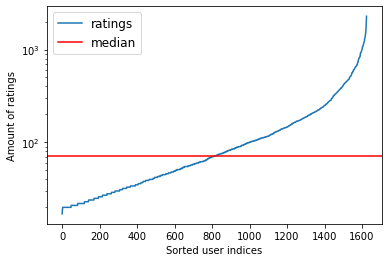

In [35]:
df = smallData['userId'].value_counts(ascending=True)
y_val = df.to_numpy()
x_val = np.array([i for i in range(len(y_val))])
mean = np.median(y_val)
print(mean)
fig,ax = plt.subplots()
ax.plot(x_val,y_val,label='ratings')
ax.set_yscale('log')
ax.axhline(y=mean,color='r',linestyle='-',label='median')
ax.legend(fontsize=12)
#ax.set_xticks([0,40000,80000,120000,160000])
ax.set_xlabel('Sorted user indices')
ax.set_ylabel('Amount of ratings')
#fig.savefig('figs/users_vs_ratingsv2')
fig.show()